# RMBI 3110 Topic 7: Value at Risk and Short Fall Risk

#### 1. Data Preprocessing
#### 2. Nonparametric Estimation of Risk Measure
#### 3. Standard Error of Estimation 
#### 4. Parametric Estimation of Risk Measure
#### 5. Parametric Estimation with Monte-Carlo Simulation
#### 6. Autocorrelation and Non-normality of Return: Independent Return ?
#### 7. Autocorrelation and Non-normality of Return: Normal Return ?
#### 8. VaR and CVaR for Portfolio Investment

<font size="4">Before our coding, we need to import some packages to handle the data. The packages used are:</font>
<ol>
<li><font size="4">Pandas</font></li>
<li><font size="4">Numpy</font></li>
<li><font size="4">matplotlib</font></li>
</ol>

In [1]:
# Data analysis and manipulation tool
import pandas as pd

# Numerical computing of array and matrix
import numpy as np

# Provides a MATLAB-like way of plotting
import matplotlib.pyplot as plt

# 1. Data Preprocessing

In [2]:
# Import the data set 'apple.csv'
# Transform the first column as the row (index_col=0)
apple=pd.read_csv("data/apple.csv",index_col=0)

In [3]:
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-07,20.494286,20.519285,19.848215,19.928572,17.373989,793648800
2012-11-08,20.022499,20.079643,19.117500,19.205357,16.743479,1056146000
2012-11-09,19.300714,19.817142,19.061428,19.537857,17.033361,929913600
2012-11-12,19.791071,19.803572,19.237499,19.386786,16.901649,515802000
2012-11-13,19.246786,19.660000,19.155714,19.389286,16.903831,532949200
...,...,...,...,...,...,...
2020-10-12,120.059998,125.180000,119.279999,124.400002,124.400002,240226800
2020-10-13,125.269997,125.389999,119.650002,121.099998,121.099998,262330500
2020-10-14,121.000000,123.029999,119.620003,121.190002,121.190002,151062300


In [4]:
# Summary of basic statistical details
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,38.581717,38.982451,38.189815,38.603343,37.060424,2.014358e+08
std,21.554297,21.873378,21.215109,21.569187,22.144028,1.478722e+08
min,13.856071,14.271428,13.753572,13.947500,12.230474,3.247000e+07
25%,24.255625,24.469999,24.016250,24.254375,22.456524,1.068141e+08
50%,31.753750,31.962500,31.472501,31.708750,29.107528,1.538082e+08
75%,46.906877,47.232501,46.486874,46.923126,45.705216,2.444863e+08
max,137.589996,137.979996,130.529999,134.179993,134.179993,1.460852e+09


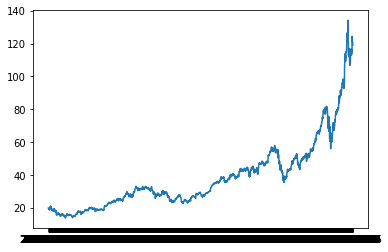

In [5]:
# Time-series plot of Apple's closing price
plt.plot(apple['Close'])

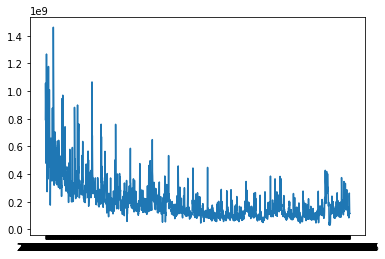

In [6]:
# Time-series plot of Apple's Volume
plt.plot(apple['Volume'])

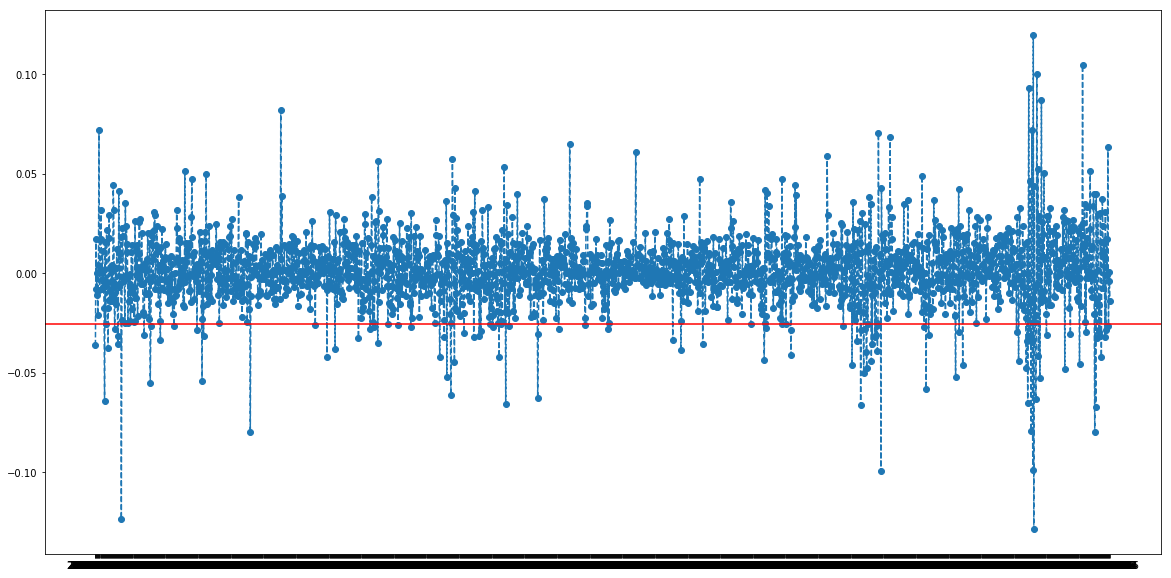

In [7]:
# Create a figure with size=(20, 10)
plt.figure(figsize=(20,10))

# Compute the simple daily return of Apple
apple['Return']=apple['Close'].pct_change()

# Plot the daily return of Apple
plt.plot(apple['Return'], linestyle='--', marker='o')

# Indicate the 5% Quantile of daily return of Apple
plt.axhline(apple['Return'].quantile(0.05), color="red")

/Users/ccmakad/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ccmakad/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


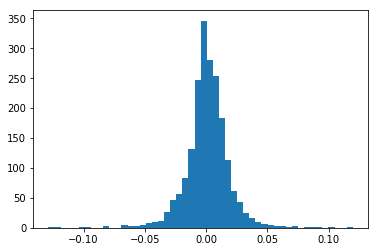

In [8]:
# Histogram of daily return of Apple
# no. of bins: 50
plt.hist(apple["Return"],bins=50)
plt.show()

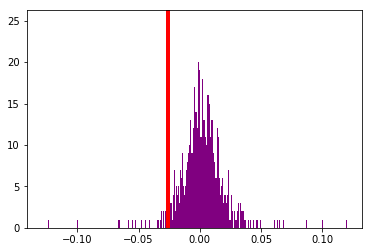

In [11]:
# Histogram of daily return of Apple
# no. of bins: 1000
plt.hist(apple['Return'].dropna(), bins=1000, color='purple')

# Indicate the 5% Quantile of daily return of Apple
plt.axvline(x=apple['Return'].dropna().quantile(0.05), linewidth=4, color='r')

In [12]:
# 5% Quantile of daily return of Apple
apple['Return'].quantile(0.05)

-0.02575171592698291

$1-\alpha=0.95$ and $VaR_{0.05}=0.0258$

In [13]:
# Import norm to use normal distribution
from scipy.stats import norm

# For standard normal r.v. P(Z<-2.33)=0.01
# Return the -2.33
norm.ppf(0.01)                               

-2.3263478740408408

# 1.  Nonparametric Estimation of Risk Measure

In [14]:
# Value at Risk(VaR)
VaR=-apple['Return'].quantile(0.05)
VaR

0.02575171592698291

In [15]:
# Shape of DataFrame 'apple'
apple.shape

(2000, 7)

In [16]:
# Shape of DataFrame 'apple' after filtering
apple[apple["Return"]<-VaR].shape

(100, 7)

In [17]:
# Daily return of apple less than -VaR
apple[apple["Return"]<-VaR]["Return"]

Date
2012-11-08   -0.036290
2012-12-05   -0.064357
2012-12-14   -0.037569
2013-01-04   -0.027855
2013-01-14   -0.035653
                ...   
2020-09-18   -0.031720
2020-09-23   -0.041946
2020-10-02   -0.032280
2020-10-06   -0.028669
2020-10-13   -0.026527
Name: Return, Length: 100, dtype: float64

In [18]:
# CVaR: mean of daily return less than -VaR
CVaR=-apple[apple["Return"]<-VaR]["Return"].mean()
CVaR

0.042060646441772785

### 1.1 Standard Error of Estimation 

In [19]:
# Shape of DataFrame 'apple'
apple.shape

(2000, 7)

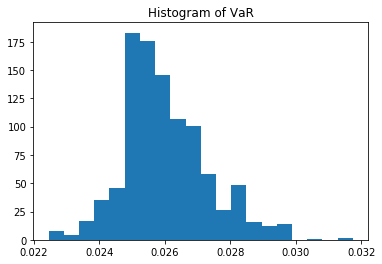

In [20]:
# Empty list for saving VaR
VaRList=[]

# For loop to resample a single dataset to create many simulated samples
for n in range(1000):
    returnsample=apple["Return"].sample(n=1000, replace=True)
    # Save the negative 5% quantile to 'VaRList'
    VaRList.append(-returnsample.quantile(0.05))

# Histogram of VaR
# no. of bins: 20
plt.hist(VaRList, bins=20)

# Title
plt.title("Histogram of VaR")
plt.show()

In [22]:
# Standard error of VaR
SE_VaR=pd.Series(VaRList).std()
SE_VaR

0.0013057099808697504

In [ ]:
####Seperate

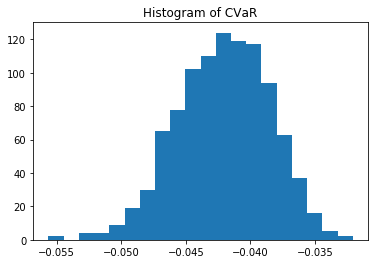

In [21]:
# Empty list for saving CVaR
CVaRList=[]

# For loop to resample a single dataset to create many simulated samples
for n in range(1000):
    returnsample=apple["Return"].sample(n=1000, replace=True)
    var=-returnsample.quantile(0.05)
    # Save the CVaR to 'CVaRList'
    CVaRList.append(returnsample[returnsample<-var].mean())

# Histogram of CVaR
# no. of bins: 20
plt.hist(CVaRList,bins=20)

# Title
plt.title("Histogram of CVaR")
plt.show()


In [23]:
# Standard error of CVaR
SE_CVaR=pd.Series(CVaRList).std()
SE_CVaR

0.0035954149241852027

# 2. Parametric Estimation of Risk Measure

/Users/ccmakad/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ccmakad/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


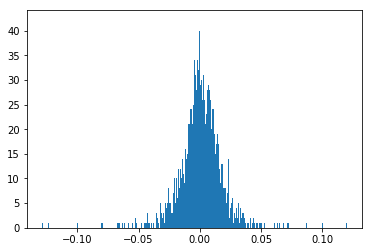

In [24]:
# Histogram of daily return of Apple
# no. of bins: 500
plt.hist(apple["Return"],bins=500)
plt.show()

In [25]:
# Mean of daily return of Apple
mean=apple["Return"].mean()
mean

0.0010584931758779558

In [26]:
# SD of daily return of Apple
std=apple["Return"].std()
std

0.01809210334154013

In [27]:
# Import norm to use normal distribution
from scipy.stats import norm

# For standard normal r.v. P(X < mean-1.645*std)=0.05
norm.ppf(0.05, mean, std)

-0.02870036862463519

In [28]:
# VaR
VaR=-norm.ppf(0.05, mean, std)
VaR

0.02870036862463519

## 2.1 Parametric Estimation with Monte-Carlo Simulation

$z$ is standard normal, what is mean of $\sqrt{z^2+1}$?

In [29]:
# Generate 1000000 values from Standard Normal Distribution r.v.
z=np.random.randn(1000000)

# Generate 1000000 values of (z^2 + 1)^0.5
X=(z**2+1)**0.5

# Mean of 1000000 values of (z^2 + 1)^0.5
X.mean()

1.3542990113314888

In [31]:
# Mean of daily return of Apple
meanDelta=apple['Return'].mean()

# SD of daily return of Apple
sigmaDelta=apple['Return'].std()

In [32]:
# Generate 1000000 values from Standard Normal Distribution r.v.
epsilon=np.random.randn(10000)

# Daily return of 'A Stock Model' in the lecture slide
dailyReturn=meanDelta+sigmaDelta*epsilon

Daily VaR at 95% level is

In [33]:
# VaR of Daily return of 'A Stock Model' in the lecture slide
VaR=-pd.Series(dailyReturn).quantile(0.05)
VaR

0.02845287393261486

To calculate CVaR, we need to get 

In [34]:
# Daily return of 'A Stock Model' less than -VaR
lossReturn=dailyReturn[dailyReturn<-VaR]

lossReturn.shape, dailyReturn.shape

((500,), (10000,))

In [35]:
# Daily return of 'A Stock Model' less than -VaR
lossReturn=dailyReturn[dailyReturn<-VaR]

# CVaR: Negative mean of Daily return of 'A Stock Model' less than -VaR
CVaR=-lossReturn.mean()
CVaR

0.03601740740744003

In [36]:
# The last price of Apple's closing price
S0=apple['Close'][-1]

# Create an array with 252 zeros
price_simmulation=np.zeros(252)

# Assign the first item as S0
price_simmulation[0]=S0

# For loop to do simmulation
for day in range(1,252):
    price_simmulation[day]=price_simmulation[day-1]+price_simmulation[day-1]*(meanDelta+sigmaDelta*np.random.randn(1))

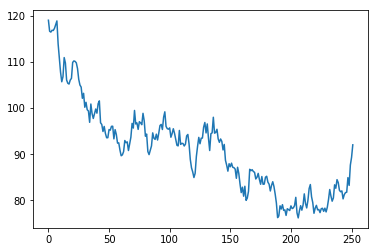

In [37]:
# Plot: price simmulation
plt.plot(price_simmulation)

Hence we should generate a lot of paths.  

In [40]:
# PriceGeneration function of above code
def PriceGeneration(S0, T, mu, sigma):
    # Create an array with T zeros
    price_simmulation=np.zeros(T)
    
    # Assign the first item as S0
    price_simmulation[0]=S0
    
    # For loop to do simmulation
    for day in range(1,T):
        price_simmulation[day]=price_simmulation[day-1]+price_simmulation[day-1]*(mu+sigma*np.random.randn(1))
    return price_simmulation

In [41]:
# Create an empty DataFrame
Stockpaths=pd.DataFrame()

# For loop to generate a lot of paths
for path in range(10000):
    Stockpaths[path]=PriceGeneration(apple['Close'][-1], 252, meanDelta, sigmaDelta)
    
# First five rows
Stockpaths.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,...,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997
1,119.449417,115.579153,117.094279,116.063598,119.104630,119.210989,121.913546,118.301675,115.393153,118.356511,...,119.308494,121.278574,119.152255,118.487514,118.778614,119.527268,114.266250,119.283514,117.591213,118.761477
2,120.177828,114.399736,116.551326,113.792149,116.642568,120.535652,120.232069,117.826303,116.476997,118.593919,...,120.001935,119.442054,119.501772,120.582748,123.904467,121.673079,112.953675,121.184236,116.200876,120.917105
3,122.700561,116.732300,118.466779,112.106294,122.009760,123.116707,120.818627,120.669411,118.683999,117.297012,...,120.244851,118.910950,120.044967,118.847588,122.866597,118.386863,115.288822,124.114125,116.902804,118.041176
4,123.681928,115.599699,118.227926,114.232442,122.991073,123.402301,119.969873,120.878065,118.605897,117.230541,...,119.210426,121.097760,121.749127,120.619618,118.581002,116.749883,118.288831,123.241077,114.110213,121.109530


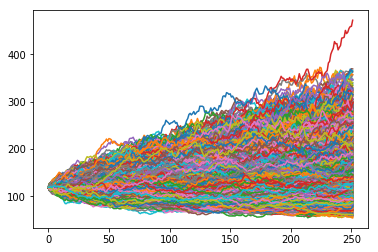

In [42]:
# Plot of 10000 paths
plt.plot(Stockpaths)
plt.show()

In [43]:
# The last column of DataFrame 'Stockpaths'
Price_T=Stockpaths.iloc[-1,:]

# Compute the return
Return_T=(Price_T-S0)/S0

# VaR: negative 5% quantile 
VaR=-Return_T.quantile(0.05)
VaR

0.22083229491456488

In [44]:
# Return less than -VaR
loss_T=Return_T[Return_T<-VaR]

# CVaR: Negative mean of Return less than -VaR
CVaR=-loss_T.mean()
CVaR

0.29911316900097246

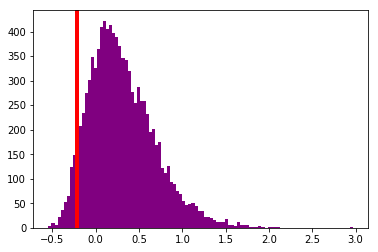

In [45]:
# Histogram of return
plt.hist(Return_T, color='purple', bins=100)

# Indicate the 5% quantile 
plt.axvline(x=Return_T.quantile(0.05), linewidth=4, color='r')

## 2.2  Independent Return ?

In [46]:
# Shift down the daily return one row
apple["ReturnLag1"]=apple['Return'].shift(1)

# First five rows of "Return","ReturnLag1"
apple[["Return","ReturnLag1"]].head()

,Return,ReturnLag1
Date,,
2012-11-07,NaN,NaN
2012-11-08,-0.036290,NaN
2012-11-09,0.017313,-0.036290
2012-11-12,-0.007732,0.017313
2012-11-13,0.000129,-0.007732


In [47]:
# correlation table of "Return","ReturnLag1"
apple[["Return","ReturnLag1"]].corr()

,Return,ReturnLag1
Return,1.000000,-0.071349
ReturnLag1,-0.071349,1.000000


In [48]:
# Autocorrelation of the daily return of apple
apple["Return"].autocorr()

-0.07134860427315212

## 2.3. Normal Return ?

In [55]:
# Sample 3 data of daily return of apple
apple["Return"].sample(n=3, replace=True)

Date
2013-07-30    0.012350
2020-05-05    0.015009
2017-12-19   -0.010656
Name: Return, dtype: float64

In [56]:
# Sample 1 data of daily return of apple
apple["Return"].sample(n=1, replace=True).values[0]

0.025314423907359496

In [57]:
# The last price of Apple's closing price
S0=apple['Close'][-1]

# Create an array with 252 zeros
price_simmulation=np.zeros(252)

# Assign the first item as S0
price_simmulation[0]=S0

# For loop to do simmulation
for day in range(1,252):
    # Sample 1 data of daily return of apple
    r=apple["Return"].sample(n=1, replace=True).values[0]
    price_simmulation[day]=price_simmulation[day-1]+price_simmulation[day-1]*r

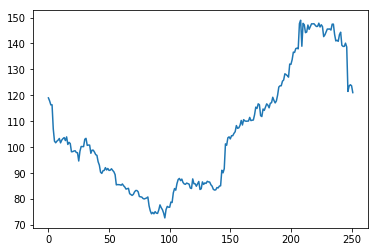

In [58]:
# Plot of price simmulation
plt.plot(price_simmulation)

In [59]:
# PriceGenerationWithBS function of above code
def PriceGenerationWithBS(S0,T,mu,sigma):
    # Create an array with T zeros
    price_simmulation=np.zeros(T)
    
    # Assign the first item as S0
    price_simmulation[0]=S0
    
    # For loop to do simmulation
    for day in range(1,T):
        # Sample 1 data of daily return of apple
        r=apple["Return"].sample(n=1, replace=True).values[0]
        price_simmulation[day]=price_simmulation[day-1]+price_simmulation[day-1]*(r)
    return price_simmulation

In [60]:
# Empty DataFrame for storing a lot of paths
Stockpaths=pd.DataFrame()

# For loop the generate the paths
for path in range(10000):
    Stockpaths[path]=PriceGenerationWithBS(apple['Close'][-1],252,meanDelta,sigmaDelta)

# First five rows
Stockpaths.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,...,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997,119.019997
1,118.533478,120.271035,118.040605,117.616858,124.643798,120.379074,121.411548,118.909107,120.219582,121.041163,...,120.013526,119.904352,117.004697,117.480310,124.060302,119.104124,117.910782,115.157075,118.488843,120.301821
2,121.051226,120.891653,115.796049,116.603922,124.848825,121.675535,122.303252,117.388297,118.924669,122.365380,...,119.031678,119.408197,117.718355,119.063245,123.987849,117.816169,118.324876,116.458193,118.790788,120.383141
3,119.587588,121.570340,118.267691,116.165290,123.059390,121.517179,122.118139,117.344932,119.088269,122.548029,...,120.442106,118.318321,114.061760,119.012919,125.508028,118.029443,117.761476,116.333960,118.968101,122.351105
4,119.959408,122.042369,115.403490,117.470452,127.967804,120.505647,123.348029,117.590370,119.416350,121.410435,...,120.465851,119.020876,112.384383,117.117215,127.464939,118.679200,121.840998,118.725434,119.854771,124.576861


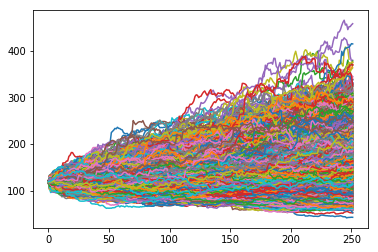

In [61]:
# Plot of 10000 paths
plt.plot(Stockpaths)
plt.show()

In [62]:
# The last column of DataFrame 'Stockpaths'
Price_T=Stockpaths.iloc[-1,:]

# Compute the return
Return_T=(Price_T-S0)/S0

# VaR: negative 5% quantile 
VaR=-Return_T.quantile(0.05)
VaR

0.22109871024911504

In [63]:
# Return less than -VaR
loss_T=Return_T[Return_T<-VaR]

# CVaR: Negative mean of Return less than -VaR
CVaR=-loss_T.mean()
CVaR

0.3047707470611795

# 3. VaR and CVaR for Portfolio Investment

In [64]:
# Import data set google.csv
# Change the dafault row to Columns 'Date'
google=pd.read_csv("data/google.csv",index_col=0)

# Empty DataFrame to store closing price of Apple and Google
Portfolio=pd.DataFrame()
Portfolio['APPL']=apple['Close']
Portfolio['GOOG']=google['Close']
Portfolio['Wealth']=Portfolio['APPL']+Portfolio['GOOG']

In [66]:
# First five rows
Portfolio.head()

,APPL,GOOG,Wealth
Date,,,
2012-11-07,19.928572,332.314392,352.242964
2012-11-08,19.205357,324.927094,344.132450
2012-11-09,19.537857,330.277039,349.814896
2012-11-12,19.386786,331.706696,351.093481
2012-11-13,19.389286,328.294464,347.683750


In [67]:
# Compute the daily return of portfolio
Portfolio['Return']=Portfolio['Wealth'].pct_change()

# First five rows
Portfolio.head()

,APPL,GOOG,Wealth,Return
Date,,,,
2012-11-07,19.928572,332.314392,352.242964,NaN
2012-11-08,19.205357,324.927094,344.132450,-0.023025
2012-11-09,19.537857,330.277039,349.814896,0.016512
2012-11-12,19.386786,331.706696,351.093481,0.003655
2012-11-13,19.389286,328.294464,347.683750,-0.009712


In [68]:
# VaR of daily return of portfolio
VaR=-Portfolio['Return'].quantile(0.05)
VaR

0.02266836729305749

In [69]:
# CVaR of daily return of portfolio
CVaR=-Portfolio[Portfolio['Return']<-VaR]["Return"].mean()
CVaR

0.035801588934483944

In [70]:
# Compute the daily return of Apple
Portfolio['Areturn']=Portfolio['APPL'].pct_change()

# Compute the daily return of Google
Portfolio['Greturn']=Portfolio['GOOG'].pct_change()

# Mean of the daily return of Apple
mu_apple=Portfolio['Areturn'].mean()

# SD of the daily return of Apple
sigma_apple=Portfolio['Areturn'].std(ddof=1)

# Mean of the daily return of Google
mu_google=Portfolio['Greturn'].mean()

# SD of the daily return of Google
sigma_google=Portfolio['Greturn'].std(ddof=1)

# Correlation between 'Areturn' and 'Greturn'
corr=Portfolio[['Areturn','Greturn']].corr().iloc[0,1]

In [72]:
# PriceGeneration function of above code
def PortfolioGeneration(S0,T,mu,sigma,rho):
    # price1: an array with T zeros
    price1=np.zeros(T)
    
    # price2: an array with T zeros
    price2=np.zeros(T)
    
    # portfolio: an array with T zeros
    portfolio=np.zeros(T)
    
    # Assign the first item of price1 as S0[0]
    price1[0]=S0[0]
    
    # Assign the first item of price2 as S0[1]
    price2[0]=S0[1]
    
    for day in range(1,T):
        # ep1: Generate one value from Standard normal r.v.
        ep1=np.random.randn(1)
        # ep2: Generate one value from Standard normal r.v.
        ep2=np.random.randn(1)
        price1[day]=price1[day-1]+price1[day-1]*(mu[0]+sigma[0]*ep1)
        price2[day]=price2[day-1]+price2[day-1]*(mu[1]+sigma[1]*(rho*ep1+((1-rho*rho)**0.5)*ep2))
    return price1+price2

In [73]:
# The last price of Apple and Google
S0=[Portfolio['APPL'][-1], Portfolio['GOOG'][-1]]

In [74]:
# Mean of the daily return of Apple and Google
mu=[mu_apple,mu_google]

# SD of the daily return of Apple and Google
sigma=[sigma_apple,sigma_google]

# Apply the PriceGeneration function
a_portfolio=PortfolioGeneration(S0,252,mu,sigma,corr)

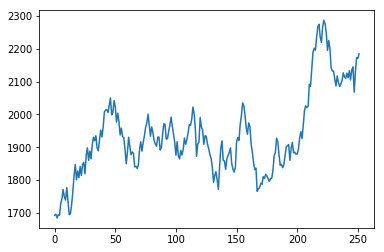

In [75]:
# Plot of portfolio
plt.plot(a_portfolio)

Next we generate 10000 paths of portfolio

In [76]:
# Empty DataFrame for storing the paths
Portfliopaths=pd.DataFrame()

# For loop to generate 10000 paths 
for path in range(10000):
    Portfliopaths[path]=PortfolioGeneration(S0,252,mu,sigma,corr)

# First five rows
Portfliopaths.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,...,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006,1692.030006
1,1633.355376,1674.710143,1694.443611,1676.915528,1693.354254,1716.393652,1699.283763,1667.709646,1689.405683,1670.409002,...,1726.658551,1703.622365,1693.838895,1665.886691,1669.112023,1647.048607,1680.276432,1682.057326,1684.869297,1710.867461
2,1625.104813,1693.199981,1687.355178,1690.848224,1722.731510,1699.533734,1713.274537,1669.550739,1719.006599,1666.026570,...,1720.124261,1734.236624,1691.932242,1655.433634,1635.935547,1648.867764,1657.878271,1670.868117,1659.083599,1719.532904
3,1621.578096,1709.533577,1693.982399,1704.463544,1749.729769,1708.850814,1728.457017,1669.726483,1683.868190,1693.076329,...,1708.990130,1779.266492,1696.760802,1641.623504,1634.258792,1663.811147,1629.291445,1666.031315,1682.999633,1725.293127
4,1620.268403,1666.032335,1677.050117,1720.383449,1764.592944,1694.889036,1753.665755,1650.306726,1623.069011,1681.035176,...,1734.747121,1794.174242,1683.955129,1687.411805,1633.554244,1669.964864,1631.133476,1655.073134,1647.127677,1700.768574


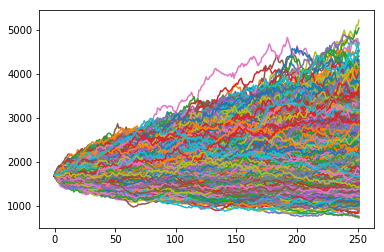

In [77]:
# Plot of 10000 paths
plt.plot(Portfliopaths)
plt.show()

In [78]:
# The last path of Portflio paths
Portfolio_T=Portfliopaths.iloc[-1,:]

# Compute the return of the last path
# S0[0]: The last price of Apple
# S0[1]: The last price of Google
Return_T=(Portfolio_T-(S0[0]+S0[1]))/(S0[0]+S0[1])

# VaR: negative 5% quantile 
VaR=-Return_T.quantile(0.05)
VaR

0.18290531329160703

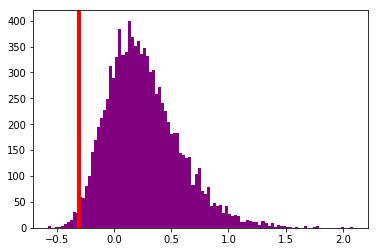

In [79]:
# Histogram of the return of the last path
# no. of bins: 100
plt.hist(Return_T,color='purple',bins=100)

# Indicate the 1% quantile
plt.axvline(x=Return_T.quantile(0.01), linewidth=4, color='r')

In [ ]:
# CVaR of the return of the last path
CVaR=-Return_T[Return_T<-VaR].mean()
CVaR